In [1]:
import camb
from camb import model

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2, binned_statistic

import cobaya

In [2]:
zs, dndz = np.loadtxt("galaxy_DR12v5_CMASS_zs_dndz.txt", unpack=True)

In [3]:
zs_cmass = zs[np.logical_and(zs >= 0.4, zs <= 0.8)]
dndz_cmass = dndz[np.logical_and(zs >= 0.4, zs <= 0.8)]

In [6]:
NSIMS = 400
cov = np.loadtxt("cmass-sim-covariance-400-nohartlap.txt")
ells, bps = np.loadtxt("cmass_clgg_bandpowers.txt", unpack=True)
#ells, bps_old = np.loadtxt("cmass_clgg_bandpowers_old.txt", unpack=True)

In [93]:
cov_sim = np.diag(np.loadtxt("cmass-theory-covariance-diag.txt"))

In [8]:
ell_edges = (ells - 0.5) - 16

In [32]:
LMIN = 20
LMAX = 320

LMIN_INDEX = np.where(ells == ells[ells > LMIN][0])[0][0]
LMAX_INDEX = np.where(ells == ells[ells < LMAX][-1])[0][0] + 1

In [94]:
#print(ells[np.logical_and(ells > 75, ells < 600)])
print(ells[LMIN_INDEX:LMAX_INDEX])

ells_analysis = ells[LMIN_INDEX:LMAX_INDEX]
bps_analysis = bps[LMIN_INDEX:LMAX_INDEX]
cov_analysis = cov_sim[LMIN_INDEX:LMAX_INDEX,LMIN_INDEX:LMAX_INDEX]
ell_edges_analysis = ell_edges[LMIN_INDEX:LMAX_INDEX+1]
print(ell_edges_analysis)

[ 49.5  81.5 113.5 145.5 177.5 209.5 241.5 273.5 305.5]
[ 33.  65.  97. 129. 161. 193. 225. 257. 289. 321.]


In [111]:
pars.SourceWindows = [
        GaussianSourceWindow(redshift=dndz_mu, source_type='counts', bias=1.62206454,
                             sigma=0.1, dlog10Ndm=0.0)
]

results = camb.get_results(pars)
cls = results.get_source_cls_dict()
camb_ells = np.arange(2, CAMB_LMAX)
camb_cls_one= 2*np.pi*cls['W1xW1'][2:CAMB_LMAX] / (camb_ells*(camb_ells+1))

In [112]:
pars.SourceWindows = [
        GaussianSourceWindow(redshift=dndz_mu, source_type='counts', bias=1.62206454,
                             sigma=0.05, dlog10Ndm=0.0)
]

results = camb.get_results(pars)
cls = results.get_source_cls_dict()
camb_ells = np.arange(2, CAMB_LMAX)
camb_cls_two= 2*np.pi*cls['W1xW1'][2:CAMB_LMAX] / (camb_ells*(camb_ells+1))

In [113]:
pars.SourceWindows = [
        GaussianSourceWindow(redshift=dndz_mu, source_type='counts', bias=1.62206454,
                             sigma=0.01, dlog10Ndm=0.0)
]

results = camb.get_results(pars)
cls = results.get_source_cls_dict()
camb_ells = np.arange(2, CAMB_LMAX)
camb_cls_three= 2*np.pi*cls['W1xW1'][2:CAMB_LMAX] / (camb_ells*(camb_ells+1))

In [120]:
pars.SourceWindows = [
        GaussianSourceWindow(redshift=dndz_mu, source_type='counts', bias=1.62206454,
                             sigma=0.02, dlog10Ndm=0.0)
]

results = camb.get_results(pars)
cls = results.get_source_cls_dict()
camb_ells = np.arange(2, CAMB_LMAX)
camb_cls_four= 2*np.pi*cls['W1xW1'][2:CAMB_LMAX] / (camb_ells*(camb_ells+1))

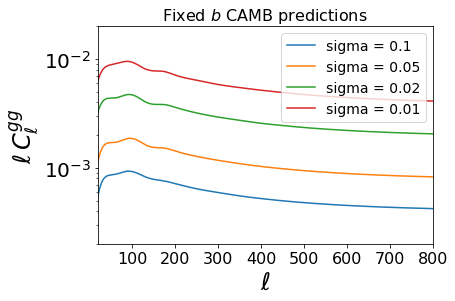

In [146]:
plt.xlim(LMIN, 800)
plt.ylim(2e-4, 2e-2)

plt.xlabel(r"$\ell$", fontsize=24)
plt.ylabel(r"$\ell \, C_\ell^{gg}$", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.title(r"Fixed $b$ CAMB predictions", fontsize=16)
plt.semilogy(camb_ells, camb_ells * camb_cls_one, label="sigma = 0.1")
plt.semilogy(camb_ells, camb_ells * camb_cls_two, label="sigma = 0.05")
plt.semilogy(camb_ells, camb_ells * camb_cls_four, label="sigma = 0.02")
plt.semilogy(camb_ells, camb_ells * camb_cls_three, label="sigma = 0.01")
plt.legend(prop={'size': 14})

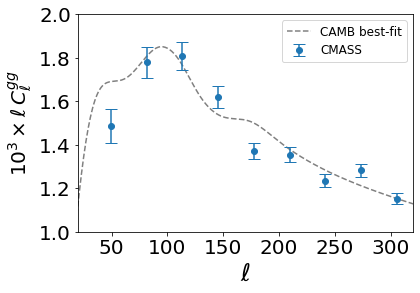

In [105]:
plt.xlim(LMIN, LMAX)
plt.ylim(1.0, 2.0)

plt.xlabel(r"$\ell$", fontsize=24)
plt.ylabel(r"$10^3 \times \ell \, C_\ell^{gg}$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(camb_ells, 1e3 * camb_ells * camb_cls, '--', color='grey', label="CAMB best-fit")
plt.errorbar(ells_analysis, 1e3 * ells_analysis * bps_analysis, 1e3 * ells_analysis * np.sqrt(np.diag(cov_analysis)),
             fmt='o', capsize=6, label="CMASS")
plt.legend(prop={'size': 12})

In [92]:
 np.sqrt(np.diag(cov_analysis))

array([7.19274719e-05, 6.55898215e-07, 1.37016769e-07, 2.78764699e-07,
       2.40475543e-07, 2.26887479e-07, 2.00767783e-07, 1.91077741e-07,
       1.69678496e-07])

In [49]:
#Get angular power spectrum for galaxy number counts and lensing
from camb.sources import GaussianSourceWindow, SplinedSourceWindow

CAMB_LMAX = 2000
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.4, omch2=0.120, ombh2=0.0224, tau=0.054)
pars.InitPower.set_params(As=2.101e-9, ns=0.965)
pars.set_for_lmax(lmax=CAMB_LMAX, lens_potential_accuracy=1)
pars.Want_CMB = False 
pars.NonLinear = model.NonLinear_both

corrected_inv_cov = np.linalg.inv(cov_analysis)

In [52]:
dndz_mu, dndz_sigma = 0.522474914602305, 0.05040391263685186

def lnlike_b(b, pars=pars):
    pars.SourceWindows = [
        GaussianSourceWindow(redshift=dndz_mu, source_type='counts', bias=b,
                             sigma=dndz_sigma, dlog10Ndm=0.0)
        #SplinedSourceWindow(bias=b, dlog10Ndm=0.0, z=zs_cmass, W=dndz_cmass)
    ]

    results = camb.get_results(pars)
    cls = results.get_source_cls_dict()
    
    camb_ells = np.arange(2, CAMB_LMAX)
    binned_theory = binned_statistic(camb_ells, 2*np.pi*cls['W1xW1'][2:CAMB_LMAX] / (camb_ells*(camb_ells+1)),
                                     bins=ell_edges_analysis, statistic=np.mean)[0] 
    
    residual = bps_analysis - binned_theory
    
    return -0.5*(np.dot(residual, np.dot(corrected_inv_cov, residual)))

cobaya_info = {
    "likelihood": {
        "external": lnlike_b},
    
    "params": dict([
        ("b", {
            "prior": {"min": 0.1, "max": 5},
            "latex": r"b"}),
           ]),
    "sampler": {
        "mcmc": {'max_tries':10000}
    }}

In [53]:
updated_info_z, sampler_z = cobaya.run(cobaya_info)

[external] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {external: 2.03}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: b:2.076189
[mcmc] Sampling!
[mcmc] Progress @ 2023-12-04 17:35:09 : 1 steps taken, and 0 accepted.
[mcmc] Progress @ 2023-12-04 17:36:09 : 157 steps taken, and 3 accepted.
[mcmc] Progress @ 2023-12-04 17:37:09 : 308 steps taken, and 5 accepted.
[mcmc] Progress @ 2023-12-04 17:38:09 : 469 steps taken, and 5 accepted.
[mcmc] Progress @ 2023-12-04 17:39:10 : 640 steps 

In [54]:
np.save("updated_info.npy", updated_info_z)
np.save("sampler_products.npy", sampler_z.products())

[root] *WARNING* outlier fraction 0.06346153846153846 
Mean:  [ 1.62206454 19.13095938 19.13095938]
Covariance matrix: [[5.8280348e-05]]


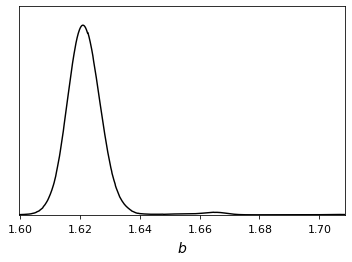

In [55]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info_z, sampler_z.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()
covmat = gd_sample.getCovMat().matrix
print("Mean: ", mean)
print("Covariance matrix:", covmat)

%matplotlib inline
import getdist.plots as gdplt
gdplot = gdplt.get_subplot_plotter()
g = gdplt.get_single_plotter(width_inch=5)
g.plot_1d(gd_sample, "b", filled=True)

In [58]:
np.sqrt(5.8280348e-5)

0.007634156665932394

In [57]:
bs = sampler_z.products()['sample'].to_numpy()[:,2]
# get rid of first ~30% of the samples as burn-in
print(f"Cobaya best-fit amplitude: {bs[-1] : 0.4f} +- {np.std(bs[int(0.3*len(bs)):]) : 0.4f}")

Cobaya best-fit amplitude:  1.6129 +-  0.0065
